In [104]:
"""

    * Pandas is a software library written for the Python programming language for data manipulation and analysis.
    * Matplotlib & seaborn are plotting libraries.
    * NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays 
      and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
    * csv is a library which helps to process csv files.
    * collections is a library which supports some external data structures.

"""

# Importing libraries for analyzing the annotated SATP news reports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import csv
import collections
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(20,13)})
plt.style.use('ggplot')



In [105]:
# Defining an array which holds the names of the components of the events

EVENTS = ['target', 'source', 'action', 'location', 'date', 'action_type']

# Data Processing Methods

In [106]:
"""

    This function processes the string to arraytype for each row and also fills up the null values
    
    INPUT - df - Dataframe
            col - Name of the column. The column is a string type column
    

"""
def process_column(df, col):
    df.fillna("NotSpecified", inplace=True)
    df[col] = df[col].str.strip('[]').str.split(',')
    #df[col] = df[col].apply(my_function)
    
"""

    This function processes the text and gets rid off the extra spaces within the labels
    
    Input - Array of Strings
    
    Example - Input - ['  ArmedAssault', 'ArmedAssault  ']
              Output - ['ArmedAssault', 'ArmedAssault']
    
    

"""
def proceess_text(data):
    for i in range(len(data)):
        data[i] = ''.join(c for c in data[i] if c not in '"')
        data[i] = ''.join(c for c in data[i] if c not in '\'')
        data[i] = ''.join(data[i].split(' '))

"""

    This function retrives the distinct labels from each row of a particular column
    
    INPUT - Column Values
    
    Example - Input - ['ArmedAssault', 'ArmedAssault']
              Output - ['ArmedAssault']

"""      
        
def get_unique(data):
    for i in range(len(data)):
        # print(data[i])
        proceess_text(data[i])
        data[i] = list(set(data[i]))
    
    
    

In [107]:
import itertools
from collections import defaultdict

"""
    
    This function takes an nested list of strings. After that it flattens the entire array. For example,
    [['kidnapped', 'killed'], ['injured']] becomes ['kidnapped', 'killed','injured']. The reason for doing
    this is - for analysis purpose, we dont want any duplicacy. Thats why getting rid off the redudency. 
    
    This function also can produce the Top K labels of given column with its respective counts.

"""

def flatten_list(data, K):
    # get_unique(data)
    flatten = list(itertools.chain.from_iterable(data))
    #proceess_text(flatten)
    records = defaultdict(int)
    track = []
    for i in flatten:
        records[i] += 1
    for k, v in records.items():
        track.append((v, k))
    track.sort(key = lambda x : [-x[0]])
    if K > 0:
        track = track[0:K]
    keep = set()
    for i in track:
        keep.add(i[1])
    final_list = []
    for i in flatten:
        if i in keep:
            final_list.append(i)
    return final_list

# Read and Check Data

In [108]:
# Importing data from csv file

############## First Round Data ##################
p1 = pd.read_csv('Data/p1.csv', header=[0])
p2 = pd.read_csv('Data/p2.csv', header=[0])
p3 = pd.read_csv('Data/p3.csv', header=[0])

############## Second Round Data ##################
p4 = pd.read_csv('Data/p4.csv', header=[0])
p5 = pd.read_csv('Data/p5.csv', header=[0])
p6 = pd.read_csv('Data/p6.csv', header=[0])


df = pd.concat([p1, p2, p3, p4, p5, p6], ignore_index=True)

In [109]:
df.head(5)

,id,target,source,action,action_type,location,date,country,year,news
0,32355,"['Rangers', 'Rangers', 'Military Police']","['Lashkar e Jhangvi LeJ', 'militants', 'milita...","['killing', 'killed', 'gunned']","['Armed Assault', 'Armed Assault', 'Armed Assa...",['Karachi'],['December 6'],pakistan,2016,Two Lashkar e Jhangvi LeJ militants Asim alias...
1,32398,"['Security Forces', 'SFs', 'civilians']",NaN,"['killed', 'fighting', 'wounded', 'fighting', ...","['Unknown', 'Unknown', 'Unknown', 'Unknown', '...",NaN,['December 20'],pakistan,2016,The Commander Southern Command Lieutenant Gene...
2,29171,"['Naga', 'Naga', 'Nagas', 'Naga']","['Manipur Naga Peopleâ€™s Front', 'MNPF', 'MNP...","['explosion', 'exploded', 'bomb', 'attack']","['Bombing/Explosion', 'Bombing/Explosion', 'Bo...",NaN,['August 30'],india,2016,Meanwhile the underground organization Manipur...
3,25445,"['Artisan Restaurant', 'foreigners', 'hostages']","['attackers', 'suicide fighters', 'suicide sol...","['gun battle', 'killing', 'injuring']","['Armed Assault', 'Armed Assault', 'Armed Assa...",['Dhaka'],"['August', '27th']",bangladesh,2016,Islamic State IS in the latest issue of its on...
4,31739,"['Muttahida Qaumi Movement', 'MQM', 'MQM']",NaN,['shot'],['Assassination'],"['Naeemabad', 'Korangi', 'Karachi', 'Sindh']",['June 19'],pakistan,2016,A senior Muttahida Qaumi Movement MQM worker i...


In [110]:
print(df.shape)

(504, 10)


In [111]:
# process - masteer
for i in EVENTS:
    process_column(df, i)
    get_unique(df[i])

/Users/shahreenshahjahanpsyche/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [112]:
df.head() # [[ArmedAssault], [Bombing]] --> [ArmedAssault, Bombing]

,id,target,source,action,action_type,location,date,country,year,news
0,32355,"[Rangers, MilitaryPolice]","[LashkareJhangviLeJ, militants]","[killing, gunned, killed]",[ArmedAssault],[Karachi],[December6],pakistan,2016,Two Lashkar e Jhangvi LeJ militants Asim alias...
1,32398,"[SFs, SecurityForces, civilians]",[NotSpecified],"[killing, fighting, wounded, killed]",[Unknown],[NotSpecified],[December20],pakistan,2016,The Commander Southern Command Lieutenant Gene...
2,29171,"[Nagas, Naga]","[MNPF, ManipurNagaPeopleâ€™sFront]","[bomb, attack, explosion, exploded]",[Bombing/Explosion],[NotSpecified],[August30],india,2016,Meanwhile the underground organization Manipur...
3,25445,"[foreigners, hostages, ArtisanRestaurant]","[suicidesoldiers, suicidefighters, attackers]","[killing, gunbattle, injuring]",[ArmedAssault],[Dhaka],"[27th, August]",bangladesh,2016,Islamic State IS in the latest issue of its on...
4,31739,"[MuttahidaQaumiMovement, MQM]",[NotSpecified],[shot],[Assassination],"[Korangi, Karachi, Sindh, Naeemabad]",[June19],pakistan,2016,A senior Muttahida Qaumi Movement MQM worker i...


In [113]:
df.loc[0, :][2][0]

'LashkareJhangviLeJ'

# Data Visulization

## 1. 0 - Ratio - Relevant vs Not Relevant

In [114]:
relevant = (len(df)/3000)*100
not_relevant = ((3000 - len(df))/3000)*100


print("Relevant news is - ", relevant, "%")
print("Not Relevant news is - ", not_relevant, "%")

Relevant news is -  16.8 %
Not Relevant news is -  83.2 %


## 1.1 Event Distribution

In [115]:
K = -1

action = flatten_list(df['action'].values, K)
target = flatten_list(df['target'].values, K)
source = flatten_list(df['source'].values, K)
action_type = flatten_list(df['action_type'].values, K)

In [116]:
from collections import Counter

Counter(action_type)

Counter({'ArmedAssault': 211,
         'Unknown': 64,
         'Bombing/Explosion': 156,
         'Assassination': 40,
         'Facility/InfrastructureAttack': 47,
         'NotSpecified': 50,
         'Hijacking': 4,
         'UnarmedAssault': 18,
         'Kidnapping': 42,
         'BarricadeIncident': 1})

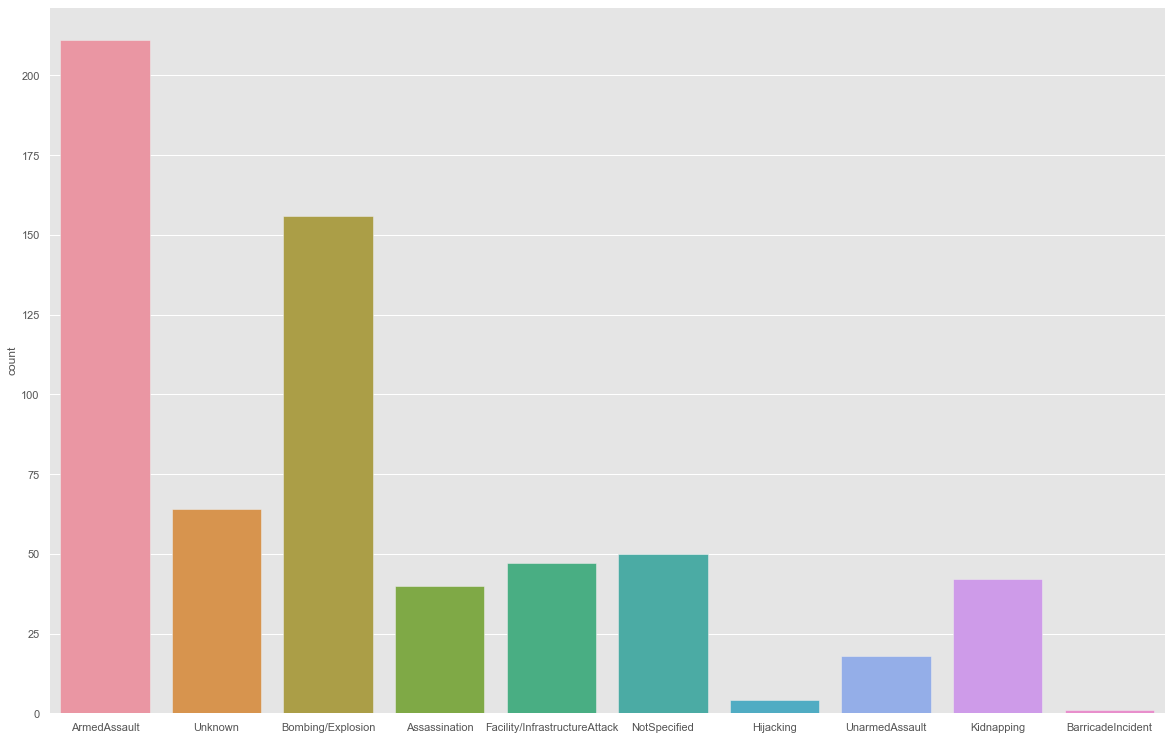

In [117]:
sns.countplot(x=action_type)

## Country Specific

In [118]:
COUNTRIES = list(set(df["country"]))
COUNTRIES

['india', 'afghanistan', 'nepal', 'bangladesh', 'srilanka', 'pakistan']

In [119]:
K = 10

df_by_country = df[df['country'] == COUNTRIES[0]]

action = flatten_list(df_by_country['action'].values, K)
target = flatten_list(df_by_country['target'].values, K)
source = flatten_list(df_by_country['source'].values, K)
action_type = flatten_list(df_by_country['action_type'].values, K)

In [120]:
Counter(action_type)

Counter({'Bombing/Explosion': 83,
         'Facility/InfrastructureAttack': 38,
         'NotSpecified': 34,
         'ArmedAssault': 129,
         'Unknown': 38,
         'UnarmedAssault': 17,
         'Kidnapping': 35,
         'Assassination': 10,
         'BarricadeIncident': 1,
         'Hijacking': 2})

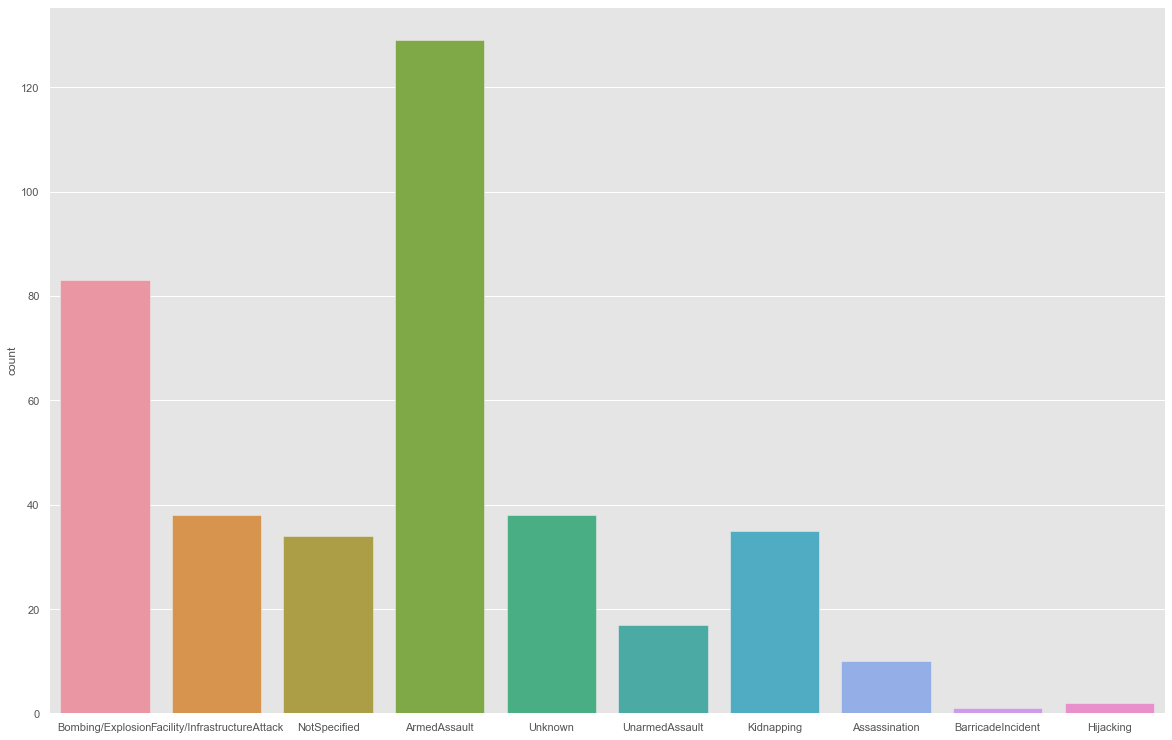

In [121]:
sns.countplot(x=action_type)

## Action-Type Count By Country

In [122]:
df_action = df.copy()
df_action = df_action.explode('action_type')
df_action.head(5)

,id,target,source,action,action_type,location,date,country,year,news
0,32355,"[Rangers, MilitaryPolice]","[LashkareJhangviLeJ, militants]","[killing, gunned, killed]",ArmedAssault,[Karachi],[December6],pakistan,2016,Two Lashkar e Jhangvi LeJ militants Asim alias...
1,32398,"[SFs, SecurityForces, civilians]",[NotSpecified],"[killing, fighting, wounded, killed]",Unknown,[NotSpecified],[December20],pakistan,2016,The Commander Southern Command Lieutenant Gene...
2,29171,"[Nagas, Naga]","[MNPF, ManipurNagaPeopleâ€™sFront]","[bomb, attack, explosion, exploded]",Bombing/Explosion,[NotSpecified],[August30],india,2016,Meanwhile the underground organization Manipur...
3,25445,"[foreigners, hostages, ArtisanRestaurant]","[suicidesoldiers, suicidefighters, attackers]","[killing, gunbattle, injuring]",ArmedAssault,[Dhaka],"[27th, August]",bangladesh,2016,Islamic State IS in the latest issue of its on...
4,31739,"[MuttahidaQaumiMovement, MQM]",[NotSpecified],[shot],Assassination,"[Korangi, Karachi, Sindh, Naeemabad]",[June19],pakistan,2016,A senior Muttahida Qaumi Movement MQM worker i...


In [123]:
aggregated = df_action.pivot_table(index = 'country', columns = 'action_type', aggfunc='size', fill_value=0)
aggregated

action_type,ArmedAssault,Assassination,BarricadeIncident,Bombing/Explosion,Facility/InfrastructureAttack,Hijacking,Kidnapping,NotSpecified,UnarmedAssault,Unknown
country,,,,,,,,,,
afghanistan,2,1,0,13,3,1,4,5,0,17
bangladesh,9,5,0,7,1,0,0,2,1,2
india,129,10,1,83,38,2,35,34,17,38
nepal,0,0,0,5,1,0,0,1,0,0
pakistan,71,24,0,48,4,1,3,8,0,6
srilanka,0,0,0,0,0,0,0,0,0,1


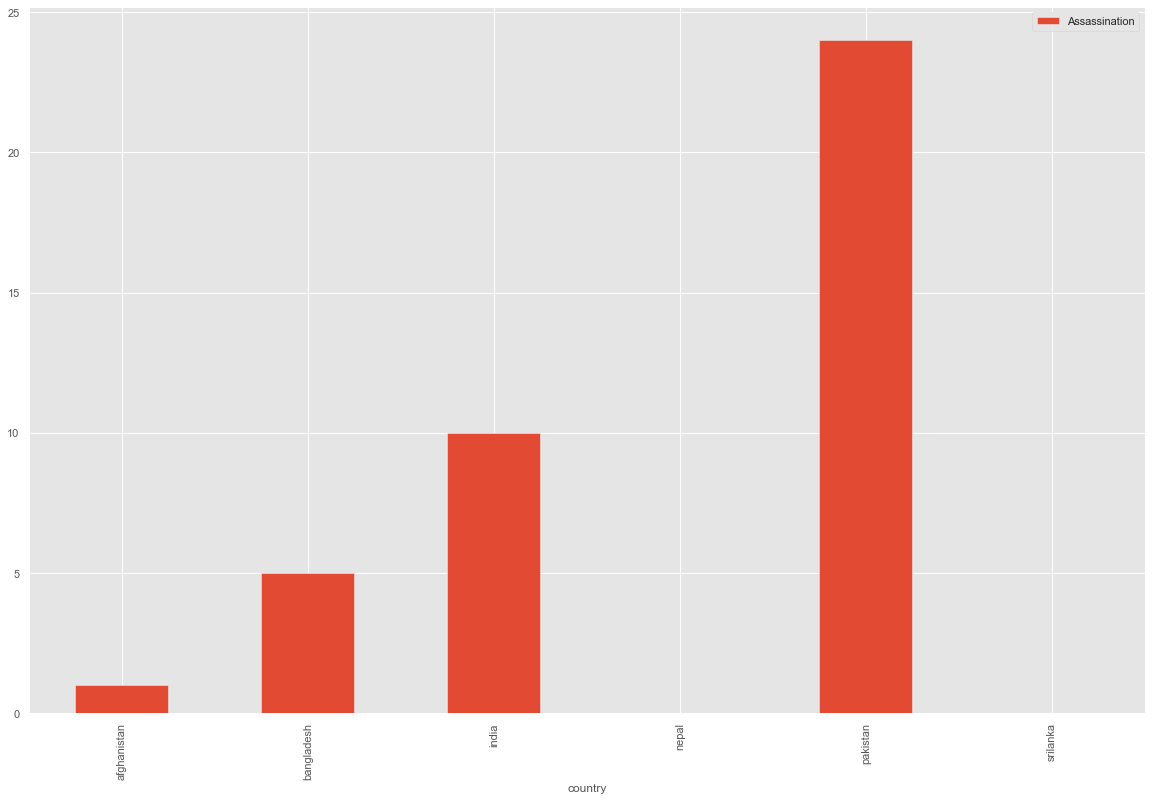

In [124]:
aggregated.plot(kind='bar', y='Assassination')

## Action-Type Count By Year

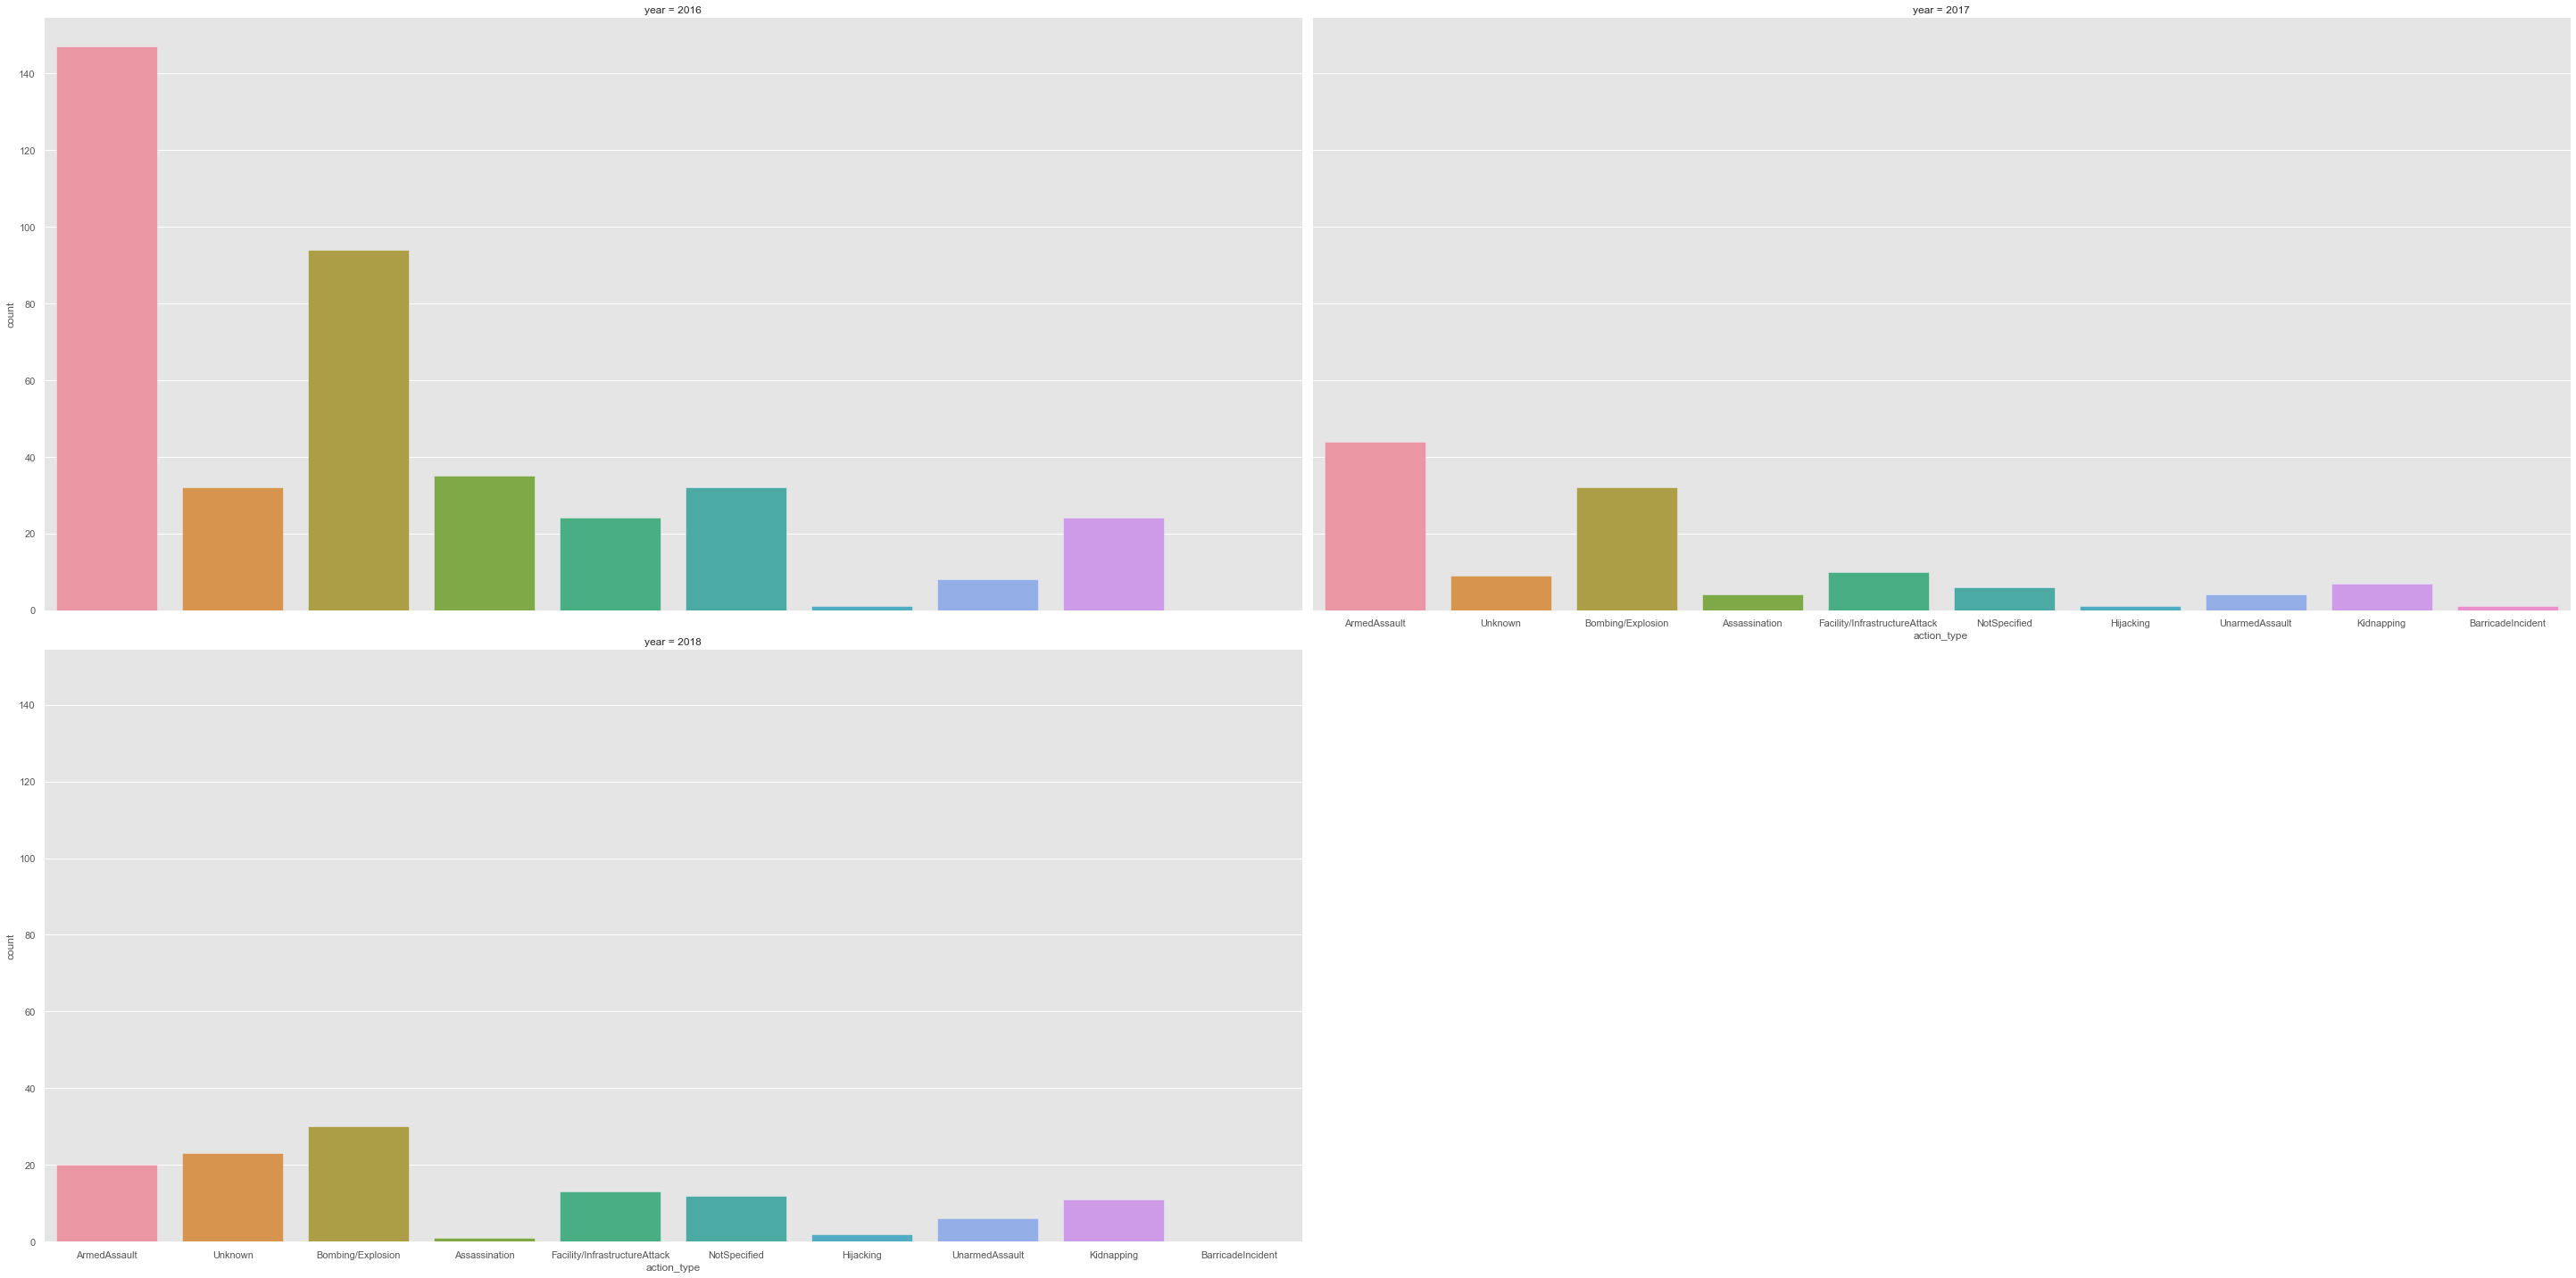

In [125]:
df_action_by_year = df.copy()
df_action_by_year = df_action_by_year.explode('action_type')

g = sns.catplot(x="action_type", col="year", col_wrap=2,
                data=df_action_by_year,
                kind="count", height=10, aspect=2)